In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     

[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\ningesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading pack

[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
np.random.seed(500)

In [8]:
Corpus = pd.read_csv(r"personalityData.csv",encoding='latin-1',nrows=10,error_bad_lines=False)

In [9]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [10]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

In [11]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [12]:
listofclasses=list(Encoder.classes_)
listofclasses
algorithmname=[]
algoaccuracy=[]

In [13]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [14]:
Train_X_Tfidf

<7x1894 sparse matrix of type '<class 'numpy.float64'>'
	with 2300 stored elements in Compressed Sparse Row format>

In [15]:
print(Tfidf_vect.vocabulary_)

{'intj': 894, 'moment': 1097, 'http': 815, 'sportscenter': 1579, 'top': 1717, 'ten': 1678, 'play': 1261, 'experience': 586, 'life': 986, 'repeat': 1400, 'perc': 1234, 'immerse': 840, 'last': 958, 'thing': 1693, 'infj': 860, 'friend': 679, 'post': 1286, 'facebook': 605, 'commit': 315, 'suicide': 1632, 'next': 1148, 'day': 401, 'rest': 1411, 'sorry': 1564, 'hear': 773, 'distress': 468, 'natural': 1134, 'relationship': 1387, 'perfection': 1238, 'time': 1709, 'every': 571, 'existence': 582, 'try': 1741, 'figure': 638, 'hard': 760, 'growth': 738, 'game': 695, 'set': 1482, 'wellbrutin': 1833, 'least': 973, 'thirty': 1696, 'minute': 1085, 'move': 1109, 'leg': 976, 'mean': 1060, 'sit': 1524, 'desk': 432, 'chair': 258, 'weed': 1828, 'moderation': 1094, 'maybe': 1055, 'edible': 511, 'healthier': 771, 'alternative': 58, 'come': 310, 'three': 1702, 'item': 913, 'determine': 438, 'type': 1747, 'whichever': 1841, 'want': 1818, 'would': 1871, 'likely': 988, 'use': 1776, 'give': 711, 'cognitive': 305,

In [16]:
print(Train_X_Tfidf)

  (0, 1880)	0.04645714944196737
  (0, 1871)	0.07525283238686485
  (0, 1868)	0.03949282134984721
  (0, 1865)	0.020622895747571538
  (0, 1855)	0.027587223839691685
  (0, 1846)	0.04645714944196737
  (0, 1835)	0.030718805606871742
  (0, 1830)	0.06910310386362367
  (0, 1824)	0.03435229297344275
  (0, 1818)	0.05643962429014864
  (0, 1816)	0.03949282134984721
  (0, 1802)	0.04645714944196737
  (0, 1801)	0.04645714944196737
  (0, 1799)	0.034551551931811836
  (0, 1788)	0.04645714944196737
  (0, 1777)	0.03949282134984721
  (0, 1766)	0.04645714944196737
  (0, 1763)	0.03949282134984721
  (0, 1758)	0.04645714944196737
  (0, 1747)	0.24910549863821932
  (0, 1726)	0.04645714944196737
  (0, 1725)	0.07898564269969442
  (0, 1721)	0.03949282134984721
  (0, 1710)	0.034551551931811836
  (0, 1709)	0.03435229297344275
  :	:
  (6, 167)	0.025042457122360782
  (6, 166)	0.06272872999410077
  (6, 145)	0.018720549247671185
  (6, 137)	0.031364364997050385
  (6, 136)	0.03584983001702633
  (6, 126)	0.03584983001702633


In [17]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
filename = 'naive_bayes_model.sav'
pickle.dump(Naive, open(filename, 'wb'))

acc=accuracy_score(predictions_NB, Test_Y)*100
algorithmname.append('Naive Bayes')
algoaccuracy.append(acc)

Naive Bayes Accuracy Score ->  33.33333333333333


In [18]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_NB, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.3333333333333333
recall is 0.16666666666666666
f1score is 0.2222222222222222


C:\Users\ningesh\.conda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ningesh\.conda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
listofclasses

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [74]:
Test_Y.tolist()

[14,
 10,
 12,
 8,
 8,
 14,
 6,
 8,
 9,
 9,
 0,
 3,
 7,
 14,
 7,
 8,
 8,
 8,
 8,
 7,
 8,
 9,
 10,
 7,
 12,
 1,
 1,
 8,
 14,
 7,
 8,
 9,
 7,
 14,
 3,
 9,
 8,
 9,
 1,
 9,
 7,
 7,
 1,
 10,
 10,
 10,
 9,
 0,
 8,
 8,
 10,
 7,
 6,
 9,
 8,
 3,
 1,
 14,
 9,
 1,
 8,
 8,
 9,
 7,
 1,
 10,
 14,
 3,
 2,
 9,
 8,
 13,
 8,
 10,
 14,
 0,
 3,
 14,
 3,
 14,
 7,
 12,
 8,
 7,
 9,
 8,
 7,
 10,
 7,
 10,
 8,
 8,
 0,
 10,
 7,
 8,
 5,
 8,
 12,
 0,
 10,
 8,
 7,
 10,
 9,
 7,
 7,
 9,
 4,
 10,
 10,
 9,
 7,
 3,
 7,
 9,
 8,
 7,
 9,
 8,
 8,
 7,
 7,
 9,
 8,
 7,
 9,
 14,
 8,
 10,
 9,
 9,
 8,
 10,
 7,
 10,
 10,
 9,
 8,
 7,
 10,
 8,
 1,
 8,
 8,
 8,
 8,
 7,
 7,
 8,
 10,
 8,
 9,
 0,
 10,
 7,
 8,
 6,
 12,
 1,
 3,
 10,
 3,
 11,
 10,
 10,
 0,
 2,
 8,
 14,
 9,
 10,
 10,
 8,
 1,
 8,
 7,
 12,
 10,
 9,
 10,
 9,
 2,
 7,
 8,
 3,
 2,
 7,
 8,
 9,
 8,
 9,
 8,
 10,
 8,
 7,
 8,
 10,
 7,
 3,
 8,
 10,
 0,
 8,
 7,
 8,
 9,
 8,
 12,
 10,
 5,
 3,
 8,
 8,
 7,
 8,
 9,
 7,
 8,
 1,
 3,
 8,
 9,
 14,
 8,
 7,
 10,
 8,
 8,
 7,
 3,
 7,
 8,
 8,
 9,
 8,


In [22]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

#listofclasses


expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_NB.tolist()) 
print(expected)
print(predicted)
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

C:\Users\ningesh\.conda\envs\project\lib\site-packages\numpy\lib\arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: y contains previously unseen labels: ['INFJ' 'INTJ']

C:\Users\ningesh\.conda\envs\project\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


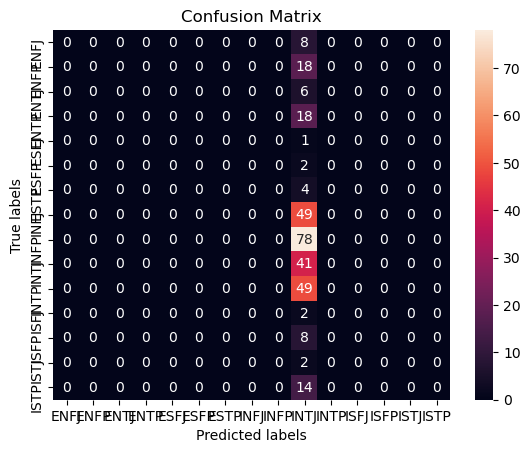

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [77]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_linear_model.sav'
pickle.dump(SVM, open(filename, 'wb'))
acc=accuracy_score(predictions_SVM, Test_Y)*100
algorithmname.append('SVM')
algoaccuracy.append(acc)

SVM Accuracy Score ->  7.000000000000001


In [78]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_SVM, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


precision is 0.12014952629310659
recall is 0.05506077352767248
f1score is 0.05952929858812212


[[ 0  0  0  0  0  0  0  0  2  4  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  2 12  1  2  0  0  0]
 [ 0  0  1  0  0  0  0  0  2  2  0  1  0  0  0]
 [ 0  0  0  6  0  0  0  0  1  6  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 30 15  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 69  3  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 12 18  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  1 36  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  1  2  0  0  0]]


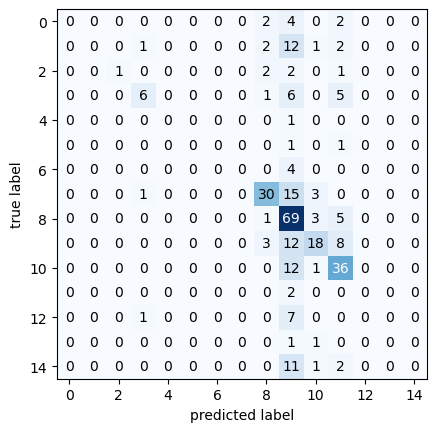

In [79]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_SVM.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

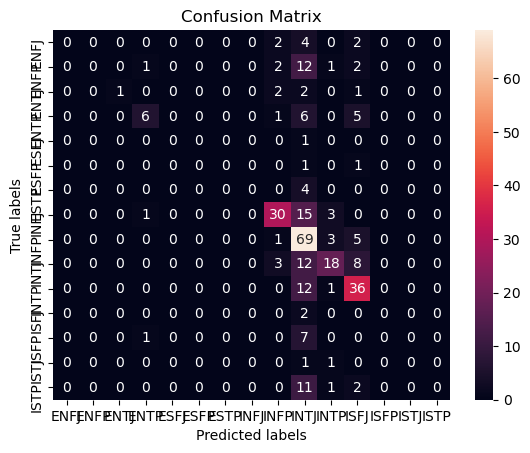

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_SVM.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [81]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_rbf_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM Accuracy Score ->  13.666666666666666


In [82]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
filename = 'svm_sigmoid_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM Accuracy Score ->  13.666666666666666


[[ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]]


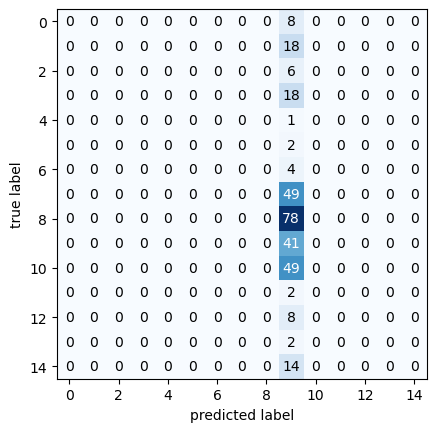

In [83]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_SVM.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

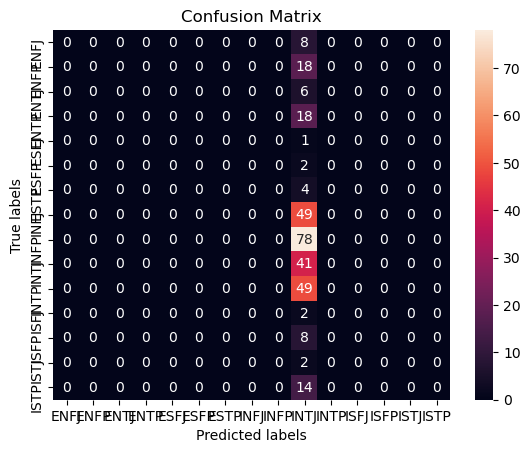

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_SVM.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=2500, random_state=0)
classifier.fit(Train_X_Tfidf, Train_Y) 

predictions_RF = classifier.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("RF Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)
filename = 'random_forest_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
acc=accuracy_score(predictions_RF, Test_Y)*100
algorithmname.append('Random Forest')
algoaccuracy.append(acc)

RF Accuracy Score ->  7.666666666666666


ValueError: y contains previously unseen labels: [15]

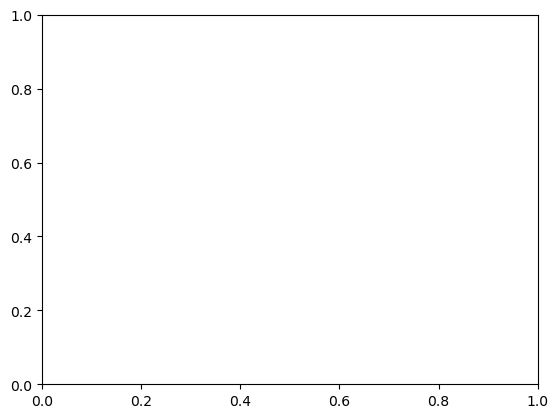

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels =listofclasses# ['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(predictions_RF.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_RF, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


In [ ]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_RF.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(Train_X_Tfidf, Train_Y) 

predictions_RF = classifier.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("RF Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)

In [ ]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =predictions_RF.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
op=precision_recall_fscore_support(Test_Y, predictions_RF, average='macro')

print("precision is "+str(op[0]))
print("recall is "+str(op[1]))
print("f1score is "+str(op[2]))


In [ ]:
Train_X_Tfidf.shape

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(Train_X, Train_Y)



y_pred = logreg.predict(Test_X)

print('accuracy %s' % accuracy_score(y_pred, Test_Y)*100)
acc=accuracy_score(y_pred, Test_Y)*100
algorithmname.append('Logistic regression')
algoaccuracy.append(acc)
#print(classification_report(y_test, y_pred))

accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.26666666666666666accuracy 0.266666666

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 2 1 0 0 0 0 0]
 [0 0 0 0 1 4 0 1 0 0 0]
 [0 0 0 0 1 1 0 4 0 0 0]
 [0 0 0 0 1 0 0 2 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]]


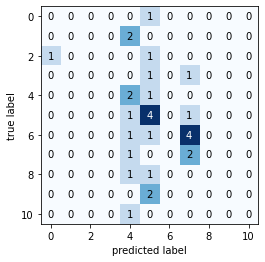

In [59]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = Test_Y.tolist()
predicted =y_pred.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

C:\Users\ningesh\.conda\envs\project\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


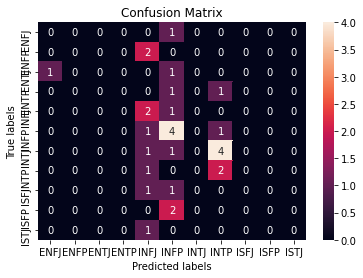

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels = listofclasses#['delhi.txt', 'mumbai.txt','pune.txt']
ax= plt.subplot()
expected =Encoder.inverse_transform(Test_Y.tolist()) 
predicted =Encoder.inverse_transform(y_pred.tolist()) 
cm = confusion_matrix(expected, predicted, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


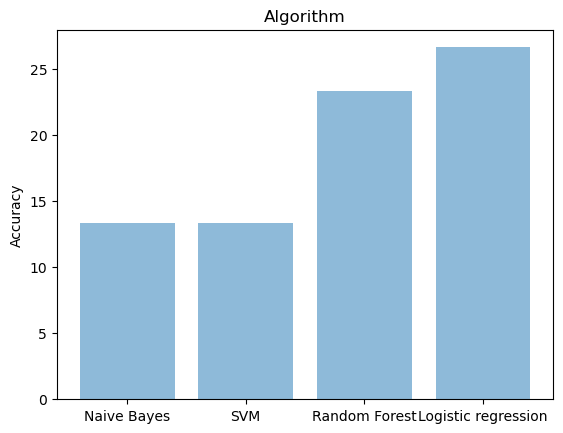

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects =algorithmname
y_pos = np.arange(len(objects))
performance = algoaccuracy

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm')

plt.show()

In [87]:
#count_vect = CountVectorizer()

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
filename='naive_bayes_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [2]:
Corpus = pd.read_csv(r"personalityData.csv",encoding='latin-1',nrows=10,error_bad_lines=False)
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [2]:
Corpus = pd.read_csv(r"processed_data.csv",encoding='latin-1',nrows=10,error_bad_lines=False)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])

TfidfVectorizer(max_features=5000)

In [10]:
predictions_RF = loaded_model.predict(Tfidf_vect.transform(['hi hello']))

In [11]:
predictions_RF[0]

'INTP'

In [6]:
listofclasses=['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [7]:
listofclasses[predictions_RF[0]-1]

TypeError: unsupported operand type(s) for -: 'numpy.str_' and 'int'

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 31 17:24:46 2020

@author: ningesh
"""

import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
filename='naive_bayes_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
Corpus = pd.read_csv(r"processed_data.csv",encoding='latin-1',nrows=10,error_bad_lines=False)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])

predictions_RF = loaded_model.predict(Tfidf_vect.transform(['hi hello']))
print(predictions_RF)

[1]
